In [13]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [14]:
Data = pd.read_csv("Dataset.csv")
TingkatSekarang = Data['TingkatSekarang']
Integritas = Data['Integritas']
Care = Data['Care']
Excelent = Data['Excelent']
MasaKerja = Data['MasaKerja']

In [15]:
Integritas = Integritas.sort_values(ascending=True)
Care = Care.sort_values(ascending=True)
Excelent = Excelent.sort_values(ascending=True)
MasaKerja = MasaKerja.sort_values(ascending=True)
TingkatSekarang = TingkatSekarang.sort_values(ascending=True)

Integritas = ctrl.Antecedent(Integritas, 'Integritas')
Care = ctrl.Antecedent(Care, 'Care')
Excelent = ctrl.Antecedent(Excelent, 'Excelent')
MasaKerja = ctrl.Antecedent(MasaKerja, 'MasaKerja')
TingkatSekarang = ctrl.Consequent(TingkatSekarang, 'TingkatSekarang')

Integritas.automf(3)
Care.automf(3)
Excelent.automf(3)
MasaKerja.automf(3)
TingkatSekarang.automf(3)

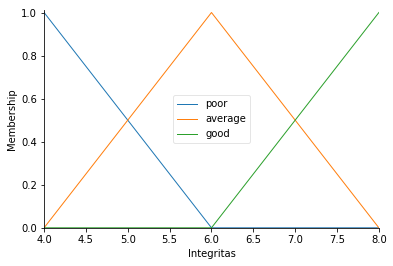

In [16]:
Integritas.view()

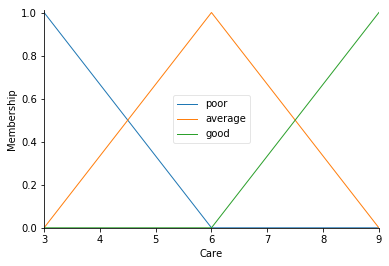

In [17]:
Care.view()

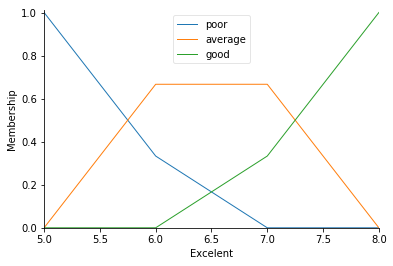

In [18]:
Excelent.view()

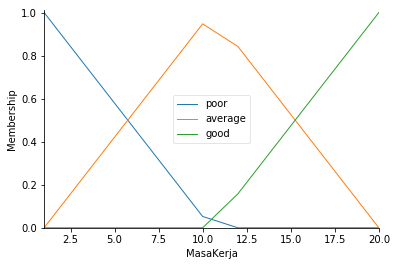

In [19]:
MasaKerja.view()

In [20]:
rule1 = ctrl.Rule(Integritas['poor'] | Care['poor'], TingkatSekarang['poor'])
rule2 = ctrl.Rule(Integritas['average'], TingkatSekarang['average'])
rule3 = ctrl.Rule(Integritas['good'] | Care['good'], TingkatSekarang['good'])
rule4 = ctrl.Rule(Integritas['poor'] | Excelent['poor'], TingkatSekarang['poor'])
rule5 = ctrl.Rule(Integritas['good'] | Excelent['good'], TingkatSekarang['good'])
rule6 = ctrl.Rule(Integritas['poor'] | MasaKerja['poor'], TingkatSekarang['poor'])
rule7 = ctrl.Rule(Integritas['good'] | MasaKerja['good'], TingkatSekarang['good'])
rule8 = ctrl.Rule(Care['poor'] | Excelent['poor'], TingkatSekarang['poor'])
rule9 = ctrl.Rule(Care['average'], TingkatSekarang['average'])
rule10 = ctrl.Rule(Care['good'] | Excelent['good'], TingkatSekarang['good'])
rule10 = ctrl.Rule(Care['poor'] | MasaKerja['poor'], TingkatSekarang['poor'])
rule11 = ctrl.Rule(Care['good'] | MasaKerja['good'], TingkatSekarang['good'])
rule12 = ctrl.Rule(Excelent['poor'] | MasaKerja['poor'], TingkatSekarang['poor'])
rule13 = ctrl.Rule(Excelent['average'], TingkatSekarang['average'])
rule14 = ctrl.Rule(Excelent['good'] | MasaKerja['good'], TingkatSekarang['good'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a5a515cb70>)

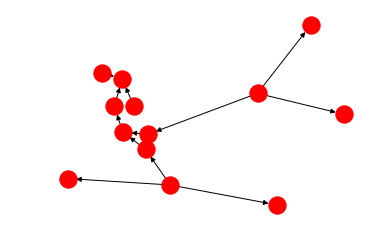

In [21]:
rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a5a5237748>)

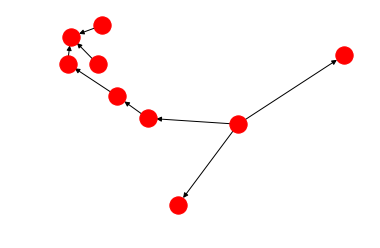

In [22]:
rule2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a5a52cc518>)

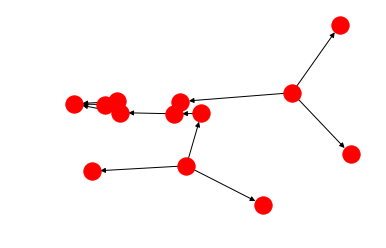

In [23]:
rule3.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a5a50fe518>)

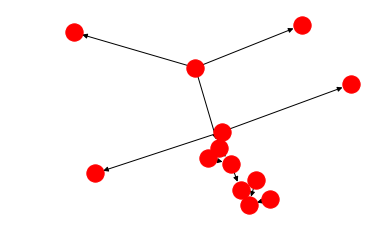

In [24]:
rule4.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a5a5343630>)

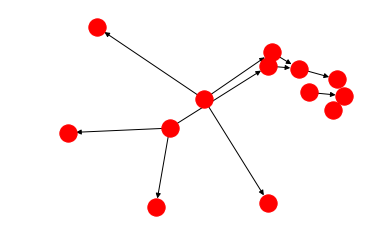

In [25]:
rule5.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a5a535d588>)

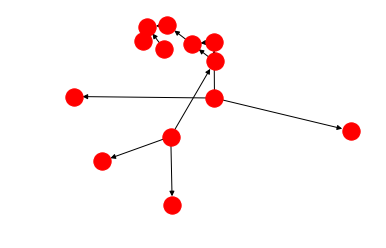

In [26]:
rule6.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a5a510e2b0>)

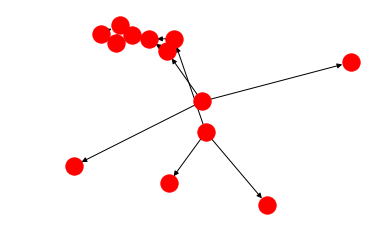

In [27]:
rule7.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a5a540cef0>)

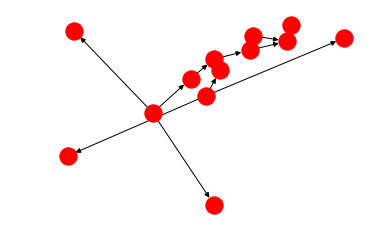

In [28]:
rule8.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a5a549c400>)

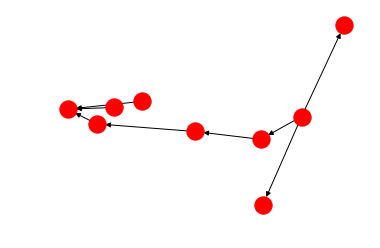

In [29]:
rule9.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a5a54eb198>)

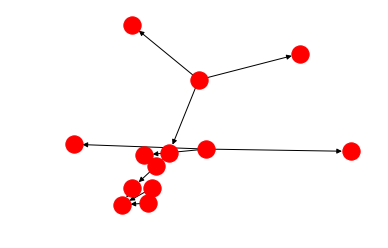

In [30]:
rule10.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a5a3715dd8>)

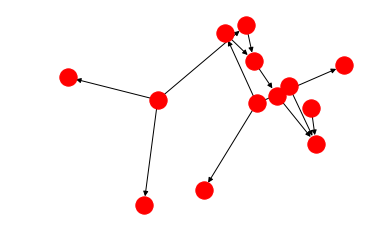

In [31]:
rule11.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a5a52cee80>)

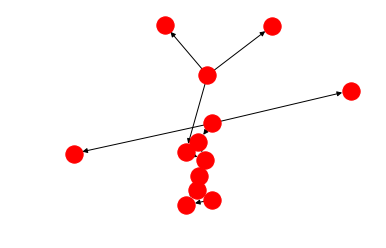

In [32]:
rule12.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a5a554f1d0>)

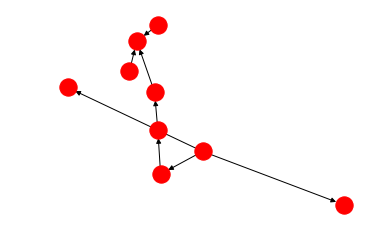

In [33]:
rule13.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a5a65689b0>)

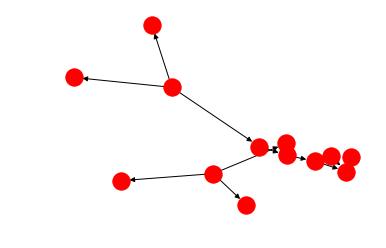

In [34]:
rule14.view()

In [62]:
TingkatSekarang_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, 
                                           rule6, rule7, rule8, rule9, rule10
                                          , rule11, rule12, rule13, rule14])

In [63]:
Rate = ctrl.ControlSystemSimulation(TingkatSekarang_ctrl)

In [64]:
Rate.input['Integritas'] = 7
Rate.input['Care'] = 8
Rate.input['Excelent'] = 5
Rate.input['MasaKerja'] = 5

Rate.compute()

7.710594315245479


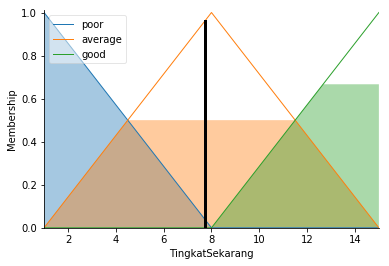

In [65]:
print(Rate.output['TingkatSekarang'])
TingkatSekarang.view(sim=Rate)

In [42]:
Rate.input['Integritas'] = 4
Rate.input['Care'] = 9
Rate.input['Excelent'] = 6
Rate.input['MasaKerja'] = 10

Rate.compute()

7.937384898710866


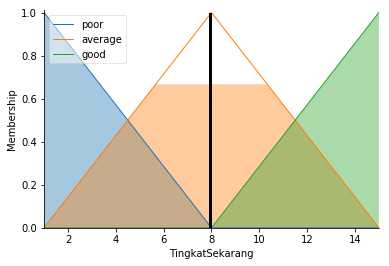

In [43]:
print(Rate.output['TingkatSekarang'])
TingkatSekarang.view(sim=Rate)

In [44]:
Rate.input['Integritas'] = 6
Rate.input['Care'] = 6
Rate.input['Excelent'] = 8
Rate.input['MasaKerja'] = 6

Rate.compute()

8.59727357774497


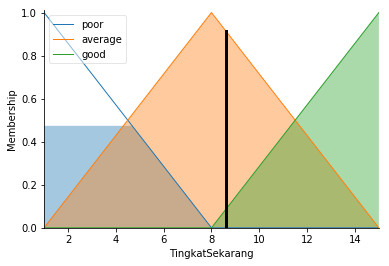

In [45]:
print(Rate.output['TingkatSekarang'])
TingkatSekarang.view(sim=Rate)

In [46]:
Rate.input['Integritas'] = 6
Rate.input['Care'] = 7
Rate.input['Excelent'] = 6
Rate.input['MasaKerja'] = 7

Rate.compute()

7.938572564694529


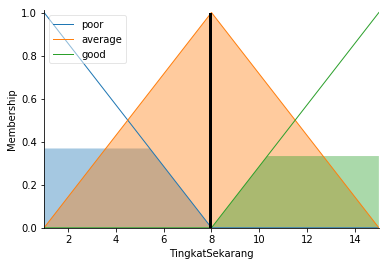

In [47]:
print(Rate.output['TingkatSekarang'])
TingkatSekarang.view(sim=Rate)

In [48]:
Rate.input['Integritas'] = 5
Rate.input['Care'] = 7
Rate.input['Excelent'] = 5
Rate.input['MasaKerja'] = 18

Rate.compute()

7.834421285520706


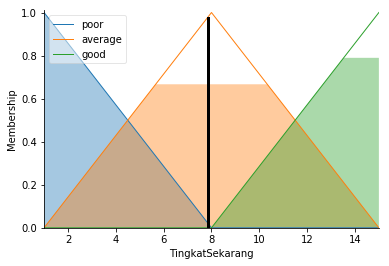

In [49]:
print(Rate.output['TingkatSekarang'])
TingkatSekarang.view(sim=Rate)

In [50]:
Rate.input['Integritas'] = 8
Rate.input['Care'] = 6
Rate.input['Excelent'] = 8
Rate.input['MasaKerja'] = 1

Rate.compute()

7.928104575163398


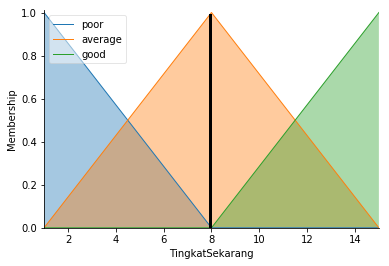

In [51]:
print(Rate.output['TingkatSekarang'])
TingkatSekarang.view(sim=Rate)

In [52]:
Rate.input['Integritas'] = 7
Rate.input['Care'] = 3
Rate.input['Excelent'] = 5
Rate.input['MasaKerja'] = 20

Rate.compute()

8.0


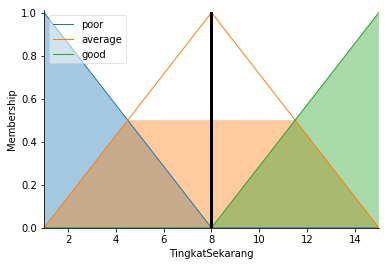

In [53]:
print(Rate.output['TingkatSekarang'])
TingkatSekarang.view(sim=Rate)

In [54]:
Rate.input['Integritas'] = 6
Rate.input['Care'] = 7
Rate.input['Excelent'] = 6
Rate.input['MasaKerja'] = 13

Rate.compute()

8.011166945840314


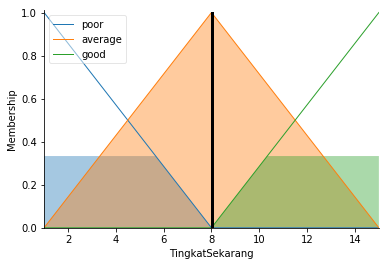

In [55]:
print(Rate.output['TingkatSekarang'])
TingkatSekarang.view(sim=Rate)

In [56]:
Rate.input['Integritas'] = 5
Rate.input['Care'] = 5
Rate.input['Excelent'] = 7
Rate.input['MasaKerja'] = 4

Rate.compute()

7.2698699501464485


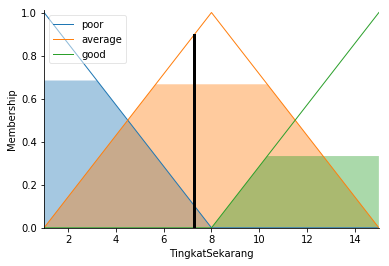

In [57]:
print(Rate.output['TingkatSekarang'])
TingkatSekarang.view(sim=Rate)